#  Code Demo + reflection on "The Role of Explainable AI in the Research Field of AI Ethics"

## 1) Summary of paper

The paper in *ACM Transactions on Interactive Intelligent Systems* systematically maps **empirical research in Explainable AI (XAI) and AI ethics**. Here are the key empirical contributions:

- Most AI ethics papers lack empirical evidence — only **23%** include it.  
- Empirical research in AI ethics surged around **2018**, mirroring public debates.  
- The **most popular paper type** is a **proposal for solving algorithmic bias**.  
- About **one-fourth** of papers propose **computational tools** to mitigate bias.
- Half of papers studying **user/practitioner attitudes** focus on modeling and structuring the field.   
- Of papers focusing on black-box issues, **84%** are fully relevant to XAI.  
- The field is **solution-oriented**, emphasizing fixes more than exploring challenges.
- XAI is a **young but growing** empirical area within AI ethics.  
- Trends show a move toward **practical implications** and **framework-level solutions** rather than purely computational fixes.  

**Takeaway:**  
The research landscape is **biased toward technical fixes for bias and black-box opacity**, but it’s still **early-stage, solution-heavy, and uneven in diversity**. More work is needed on accountability, user perspectives, and validation.



## 2) Code Demonstration: Hands-on XAI (Logistic Regression + Explanations)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



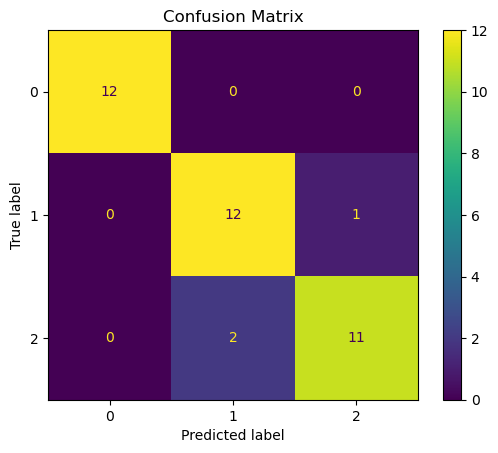

petal width (cm)     0.190789
petal length (cm)    0.153947
sepal width (cm)     0.090789
sepal length (cm)    0.052632
dtype: float64


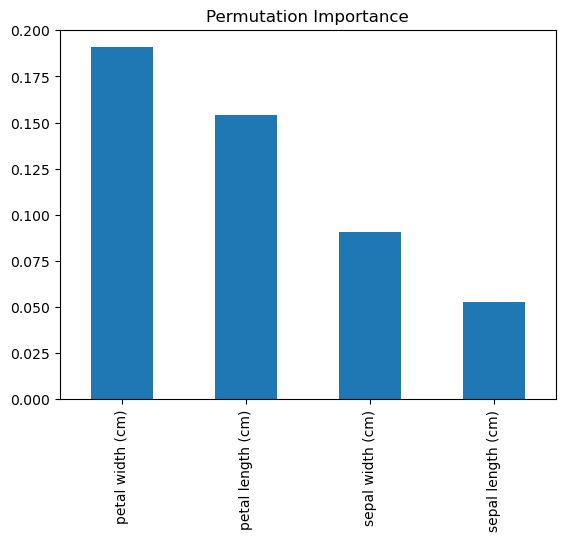

Prediction: 0, Probabilities: [9.84578820e-01 1.54208114e-02 3.68658391e-07]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# 1. Load data
X, y = load_iris(return_X_y=True, as_frame=True)
f_n = load_iris().feature_names
X.columns = f_n

# 2. Train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# 3. Pipeline build-up
clf = Pipeline(
    [("scaler", StandardScaler()), ("lr", LogisticRegression(max_iter=1000))]
)
clf.fit(X_train, y_train)

# 4. Evaluation and explanation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

r = permutation_importance(clf, X_test, y_test, n_repeats=20, random_state=42)
importances = pd.Series(r.importances_mean, index=feature_names).sort_values(
    ascending=False
)
print(importances)
importances.plot.bar(title="Permutation Importance")
plt.show()

row = X_test.iloc[[0]]
proba = clf.predict_proba(row)[0]
print(f"Prediction: {clf.predict(row)[0]}, Probabilities: {proba}")

## 3) How the code aboved ties back to the paper

- The paper highlights **bias** as the most common research focus; In the demo, permutation importance helps spot which **features contribute most to prediction bias**.  

- The **solution-oriented trend** (papers mostly fixing problems) is also being mentioned here; The demo also predicts**provides explanations** to increase transparency.  

- The **gap in user/practitioner perspectives** (accountability & usability) is clear; Suggests demos like this should be extended with **human-centered evaluations** (non-technical user).  


## Reference

Heidi Vainio-Pekka, Mamia Ori-Otse Agbese, Marianna Jantunen, Ville Vakkuri, Tommi Mikkonen, Rebekah Rousi, and Pekka Abrahamsson. 2023.  
**The Role of Explainable AI in the Research Field of AI Ethics.**  
*ACM Transactions on Interactive Intelligent Systems*, 13(4), Article 26 (December 2023), 39 pages.  
https://doi.org/10.1145/3599974
